In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # TODO: Why inline? 
%matplotlib inline 

In [107]:
raw_dataset = pd.read_csv('../data/okcupid.csv') # The original dataset also had essays, we already deleted them

okcupid_profiles = raw_dataset.drop(columns="Unnamed: 0") # This column has been introduced by mistake when we removed the essays 

## Basic Data-checking

In [108]:
print("The shape of the dataset is: ", okcupid_profiles.shape)

total_nrows = okcupid_profiles.shape[0]
total_ncols = okcupid_profiles.shape[1]
print('Total rows: ', total_nrows, ' Total columns: ', total_ncols, '\n')

print(okcupid_profiles.info(), "\n\n")

print(okcupid_profiles.describe())

The shape of the dataset is:  (59946, 21)
Total rows:  59946  Total columns:  21 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  relig

## Missing data

In [109]:
total_count = okcupid_profiles.isna().count()
count_na = okcupid_profiles.isna().sum().sort_values(ascending = False)
pct_na =(okcupid_profiles.isna().sum()/total_count).sort_values(ascending = False)

pd.options.display.float_format = '{:.1%}'.format

missing_data = pd.concat([count_na, pct_na], axis=1, keys=['Count', 'Percent'])
# Only show columns with more than 5% missing data
missing_data[missing_data['Percent']>=0.05].head(20)

,Count,Percent
offspring,35561,59.3%
diet,24395,40.7%
religion,20226,33.7%
pets,19921,33.2%
drugs,14080,23.5%
sign,11056,18.4%
job,8198,13.7%
education,6628,11.1%
ethnicity,5680,9.5%
smokes,5512,9.2%


Text(0.5, 1.0, 'Missing data count')

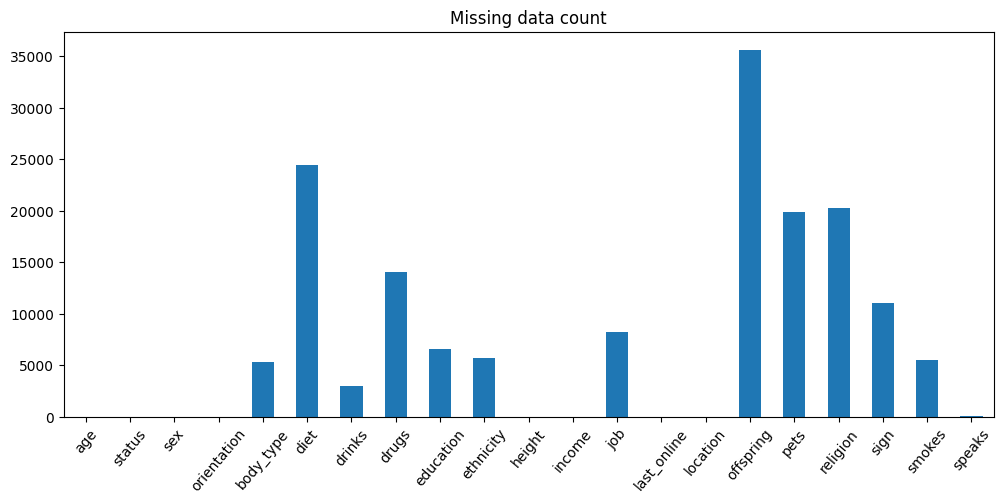

In [124]:
plt.figure(figsize=(12, 5))

okcupid_profiles.isna().sum().plot(kind="bar")

plt.xticks(rotation=50) # rotates the labels in the x axis

plt.title('Missing data count')

## Data overview

In [111]:
okcupid_profiles.groupby('sex').count()

,age,status,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks
sex,,,,,,,,,,,,,,,,,,,,
f,24117,24117,24117,21414,14204,23005,18652,21730,21702,24116,24117,20461,24117,24117,10892,17219,15871,20394,22065,24102
m,35829,35829,35829,33236,21347,33956,27214,31588,32564,35827,35829,31287,35829,35829,13493,22806,23849,28496,32369,35794


In [112]:
print("Number of users divided by sex: ")
print(okcupid_profiles['sex'].value_counts(), "\n")

print("Number of users divided by ethnicity: ")
print(okcupid_profiles['ethnicity'].value_counts().sort_values(ascending=False)[:5])

Number of users divided by sex: 
m    35829
f    24117
Name: sex, dtype: int64 

Number of users divided by ethnicity: 
white               32831
asian                6134
hispanic / latin     2823
black                2008
other                1706
Name: ethnicity, dtype: int64


In [113]:
# Unique values
print('body_type:')
print(list(set(okcupid_profiles['body_type'])))

print()
print('diet:')
print(list(set(okcupid_profiles['diet'])))

print()
print('Religion:')
print(list(set(okcupid_profiles['religion'])))

body_type:
['fit', nan, 'rather not say', 'a little extra', 'full figured', 'curvy', 'skinny', 'used up', 'average', 'thin', 'jacked', 'overweight', 'athletic']

diet:
['halal', 'strictly vegan', 'strictly anything', 'mostly vegetarian', 'anything', 'mostly kosher', 'mostly other', 'mostly halal', 'mostly anything', 'other', 'strictly halal', nan, 'strictly other', 'vegetarian', 'mostly vegan', 'vegan', 'strictly vegetarian', 'strictly kosher', 'kosher']

Religion:
['islam', 'hinduism but not too serious about it', 'hinduism and somewhat serious about it', 'other and somewhat serious about it', 'judaism but not too serious about it', 'buddhism but not too serious about it', 'catholicism', 'agnosticism but not too serious about it', 'judaism and very serious about it', 'buddhism', 'catholicism and very serious about it', 'christianity', 'islam but not too serious about it', 'agnosticism and somewhat serious about it', 'christianity and very serious about it', 'christianity but not too s

## Data visualization

<Figure size 1500x700 with 0 Axes>

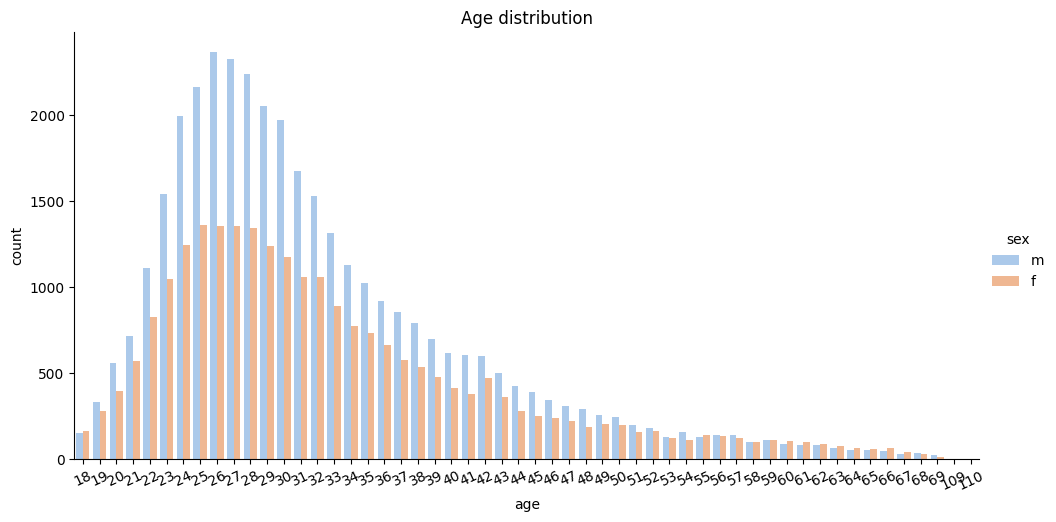

In [125]:
plt.figure(figsize=(15, 7))

sns.catplot(x = 'age', 
            data = okcupid_profiles, 
            kind = 'count', 
            palette = 'pastel', 
            hue = 'sex', 
            height = 5, # make the plot 5 units high
            aspect = 2)

plt.xticks(rotation = 25)

plt.title('Age distribution')

plt.show()

Text(0.5, 1.0, 'Sex over different ages')

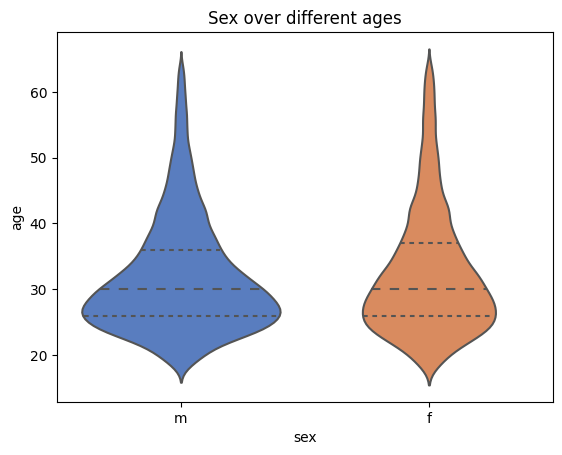

In [116]:
profile_age = okcupid_profiles[okcupid_profiles['age'] < 65]

ax = sns.violinplot(x = 'sex', 
                    y = 'age',
                    data = profile_age,
                    palette = "muted", 
                    split = True, 
                    scale = "count", 
                    inner = "quartile")

ax.set_title("Sex over different ages")

In [117]:
# Define a function to show % on catplot TODO: move to different file
def show_percetage(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 10)

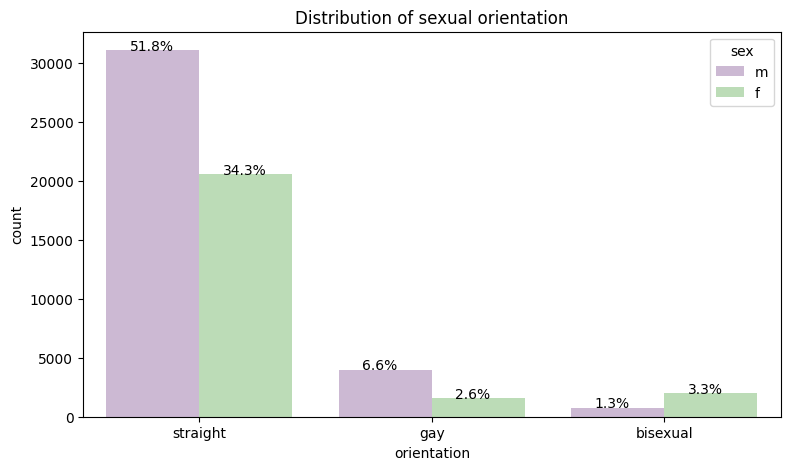

In [118]:
plt.figure(figsize = (9, 5))

ax = sns.countplot(x = 'orientation', 
                   data = okcupid_profiles, 
                   hue = 'sex', 
                   palette = 'PRGn',
                   order = okcupid_profiles['orientation'].value_counts().iloc[:10].index) 

ax.set_title("Distribution of sexual orientation")
total = float(len(okcupid_profiles))
show_percetage(ax, okcupid_profiles)
plt.show()

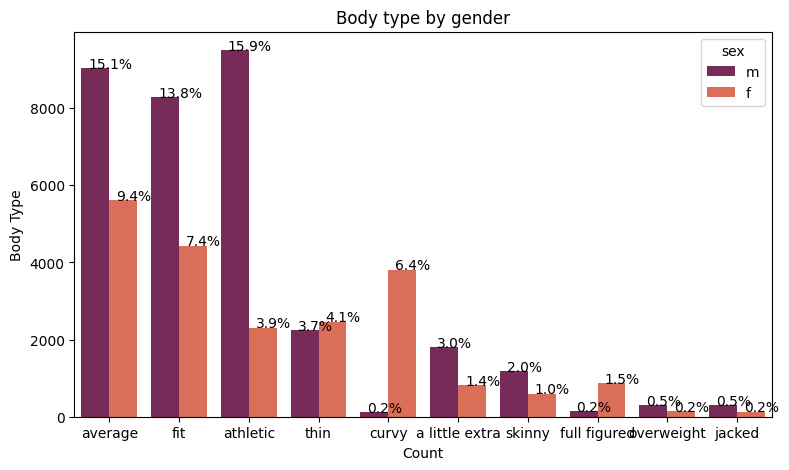

In [119]:
plt.figure(figsize = (9, 5))
ax = sns.countplot(x = 'body_type',
                   data = okcupid_profiles, 
                   hue = 'sex', 
                   palette = 'rocket',
                   order = okcupid_profiles['body_type'].value_counts().iloc[:10].index)

ax.set_title("Body type by gender")
ax.set(xlabel = 'Count', ylabel = 'Body Type') 
show_percetage(ax, okcupid_profiles)
plt.show()

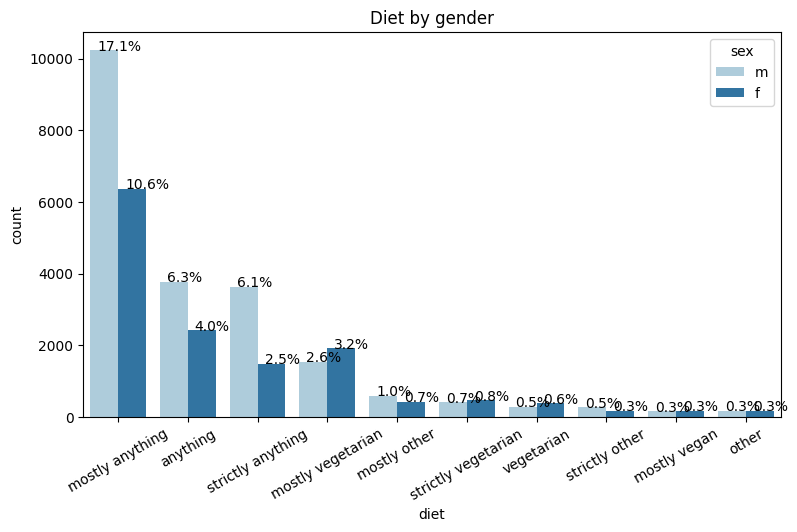

In [120]:
plt.figure(figsize = (9, 5))

ax = sns.countplot(x = 'diet', 
                   data = okcupid_profiles, 
                   hue = 'sex', 
                   palette = 'Paired',
                   order = okcupid_profiles['diet'].value_counts().iloc[:10].index) 

plt.xticks(rotation = 30)
ax.set_title("Diet by gender")
show_percetage(ax, okcupid_profiles)

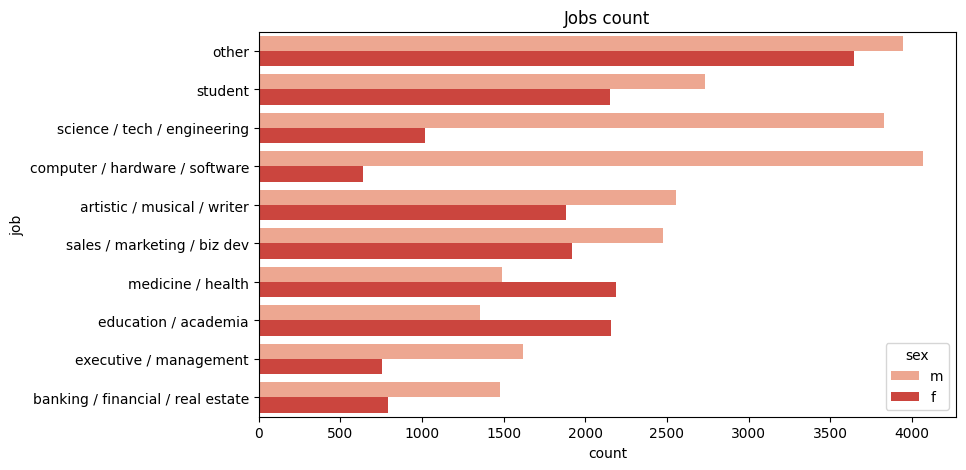

In [121]:
plt.figure(figsize = (9, 5))

sns.countplot(y = 'job', 
              data = okcupid_profiles, 
              hue = 'sex', 
              palette = 'Reds',
              order = okcupid_profiles['job'].value_counts().iloc[:10].index)

plt.title("Jobs count")
plt.show()

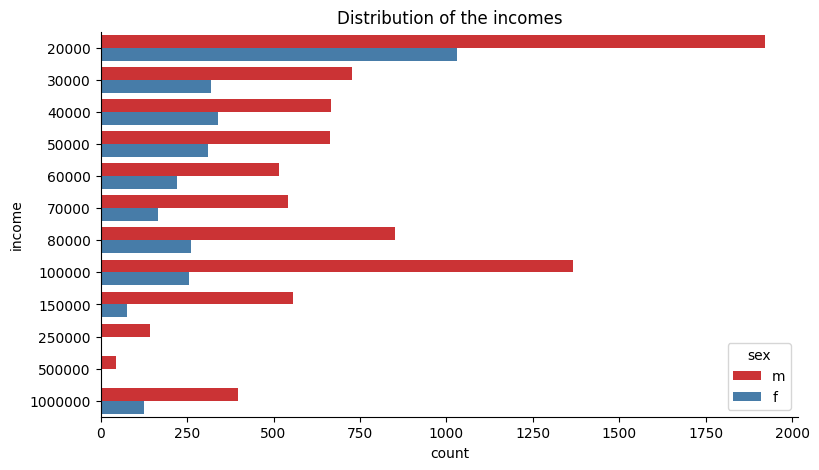

In [122]:
plt.figure(figsize = (9, 5))

okcupid_profiles_income = okcupid_profiles[okcupid_profiles.income != -1] # Remove invalid data

sns.countplot(y ='income', 
              data = okcupid_profiles_income, 
              hue = 'sex', 
              palette = 'Set1')

sns.despine() # Removes the spines from the right and upper portion of the plot
plt.title("Distribution of the incomes")
plt.show()

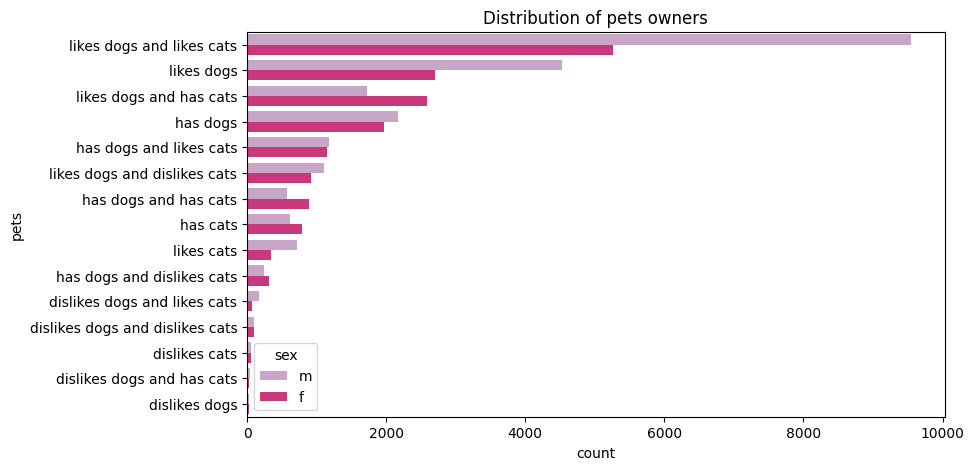

In [123]:
plt.figure(figsize = (9, 5))
sns.countplot(y = 'pets', 
              data = okcupid_profiles, 
              hue = 'sex', 
              palette = 'PuRd',
              order = okcupid_profiles['pets'].value_counts().iloc[:].index)

plt.title("Distribution of pets owners")
plt.show()